# Decision Trees for Classification and Regression

Learn about decision trees, how they work and how they can be used for classification and regression tasks.

## Introduction

- Decision trees are a common type of machine learning model used for binary classification tasks. 
- The natural structure of a binary tree lends itself well to predicting a “yes” or “no” target. 
- It is traversed sequentially here by evaluating the truth of each logical statement until the final prediction outcome is reached. 
- Some examples of classification tasks that can use decision trees are: 
    - predicting whether a student will pass or fail an exam, 
    - whether an email is spam or not, 
    - if transaction is fraudulent or legitimate, 
    - etc

<br>

- Decision trees can also be used for regression tasks! 
    - Predicting the grade of a student on an exam, 
    - the number of spam emails per day, 
    - the amount of fraudulent transactions on a platform, 
    - etc. are all possible using decision trees. 
- The algorithm works pretty much the same way, with modifications only to the splitting criteria and how the final output it computed. 
- In this article, we will explore both a binary classification and regression model using decision trees with the [Indian Graduate Admissions dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions).

### Dataset

- The data contains features commonly used in determining admission to masters’ degree programs, such as GRE, GPA, and letters of recommendation. 
- The complete list of features is summarized below:
    - GRE Scores ( out of 340 )
    - TOEFL Scores ( out of 120 )
    - University Rating ( out of 5 )
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    - Undergraduate GPA ( out of 10 )
    - Research Experience ( either 0 or 1 )
    - Chance of Admit ( ranging from 0 to 1 )
- We’re going to begin by loading the dataset as a `pandas` `DataFrame`. 
- Feel free to open up a `jupyter` notebook on the side to implement the code in the article!

In [2]:
import pandas as pd


df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_no.         400 non-null    int64  
 1   gre_score          400 non-null    int64  
 2   toefl_score        400 non-null    int64  
 3   university_rating  400 non-null    int64  
 4   sop                400 non-null    float64
 5   lor                400 non-null    float64
 6   cgpa               400 non-null    float64
 7   research           400 non-null    int64  
 8   chance_of_admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


## Decision Trees for Classification: A Recap

- As a first step, we will create a binary class (1=admission likely , 0=admission unlikely) from the `chance of admit` – greater than 80% we will consider as likely. 
- The remaining data columns will be used as predictors.

In [31]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']>=.8

### Fitting and Predicting

- We will use `scikit-learn`‘s tree module to create, train, predict, and visualize a decision tree classifier. 
- The syntax is the same as other models in `scikit-learn`, once an instance of the model class is instantiated with `dt = DecisionTreeClassifier()`, `.fit()` can be used to fit the model on the training set. 
- After fitting, `.predict()` (and `predict_proba()`) and `.score()` can be called to generate predictions and score the model on the test data.

<br>

- As with other `scikit-learn` models, only numeric data can be used (categorical variables and nulls must be handled prior to model fitting). 
- In this case, our categorical features have already been transformed and no missing values are present in the data set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01,criterion='gini')
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

0.925
0.925


- Two methods are available to visualize the tree within the tree module – the first is using `tree_plot` to graphically represent the decision tree. 
- The second uses `export_text` to list the rules behind the splits in the decision tree. 
- There are many other packages available for more visualization options – such as `graphviz`, but may require additional installations and will not be covered here.

|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True



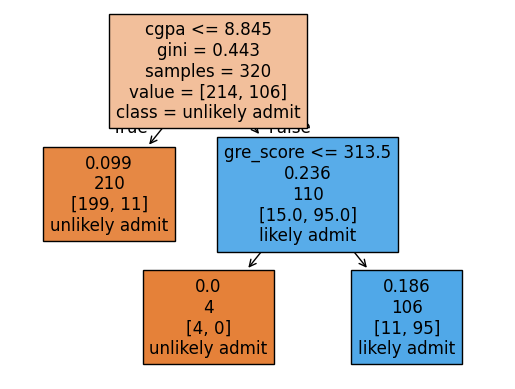

In [7]:
from sklearn import tree

tree.plot_tree(dt, feature_names = x_train.columns,  max_depth=3, class_names = ['unlikely admit', 'likely admit'], label='root', filled=True)
print(tree.export_text(dt, feature_names = X.columns.tolist()))

### Split Criteria

- For a classification task, the default split criteria is Gini impurity – this gives us a measure of how “impure” the groups are. 
- At the root node, the first split is then chosen as the one that maximizes the information gain, i.e. decreases the Gini impurity the most. 
- Our tree has already been built for us, but how was the split `cgpa<=8.845` determined? 
- `cgpa` is a continuous variable, which adds an extra complication, as the split can occur for ANY value of `cgpa`.

<br>

- To verify, we will use the defined functions `gini` and `info_gain`. 
- By running `gini(y_train)`, we get the same Gini impurity value as printed in the tree at the root node, `0.443`.

In [25]:
def gini(data):
    """Calculate the Gini Impurity Score
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)

gi = gini(y_train)
print(f'Gini impurity at root: {round(gi,3)}')

Gini impurity at root: 0.443


- Next, we are going to verify how the split on cgpa was determined, i.e. where did the 8.845 value come from:

In [26]:
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

- We will use `info_gain` over ALL values of `cgpa` to determine the information gain when split on each value. 
- This is stored in a table and sorted, and voila, the top value for the split is `cgpa<=8.845`! 
- This is also done for every other feature (and for those continuous ones, every value), to find the top split overall.

In [27]:
info_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    info_gain_list.append([i, info_gain(left, right, gi)])

ig_table = pd.DataFrame(info_gain_list, columns=['split_value', 'info_gain']).sort_values('info_gain',ascending=False)
ig_table.head(10)

,split_value,info_gain
10,8.84,0.296932
124,8.85,0.291464
139,8.88,0.290704
18,8.90,0.290054
98,8.83,0.287810
110,8.87,0.286050
152,8.94,0.284714
57,8.96,0.284210
96,8.80,0.283371
21,9.00,0.283364


- Plot the results:

Text(0, 0.5, 'info gain')

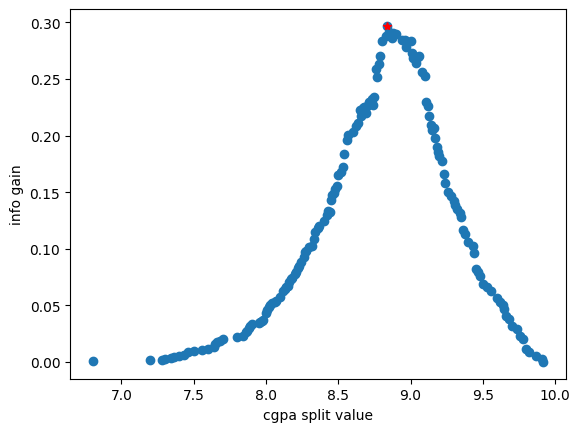

In [28]:
import matplotlib.pyplot as plt


plt.plot(ig_table['split_value'], ig_table['info_gain'],'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

- After this process is repeated, and there is no further info gain by splitting, the tree is finally built. 
- Last to evaluate, any sample traverses through tree and appropriate splits until it reaches a leaf node, and then assigned the majority class of that leaf (or weighted majority).

## Regression

- For the regression problem, we will use the unaltered `chance_of_admit` target, which is a floating point value between 0 and 1.

In [33]:
X = df.loc[:,'gre_score':'research']
y = df['chance_of_admit']

### Fitting and Predicting

- The syntax is identical as the decision tree classifier, except the target, `y`, must be real-valued and the model used must be `DecisionTreeRegressor()`. 
- As far as the model hyperparameters go, almost all are the same, except for the split criterion. 
- The split criterion now needs be suitable for a regression task – the default for regression is Mean Squared Error (or MSE). 
- Let’s investigate this:

In [34]:
from sklearn.tree import DecisionTreeRegressor


x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

0.5230242793515552


- Similarly, the tree can be visualized using `tree.plot_tree` – keeping in mind the splitting criteria is `mse` and the `value` is the average `chance_of_admit` of all samples in that leaf.

[Text(0.5, 0.8333333333333334, 'cgpa <= 8.845\nsquared_error = 0.021\nsamples = 320\nvalue = 0.727'),
 Text(0.25, 0.5, 'cgpa <= 8.035\nsquared_error = 0.012\nsamples = 210\nvalue = 0.651'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.009\nsamples = 60\nvalue = 0.533'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.006\nsamples = 150\nvalue = 0.698'),
 Text(0.75, 0.5, 'cgpa <= 9.195\nsquared_error = 0.005\nsamples = 110\nvalue = 0.872'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.003\nsamples = 55\nvalue = 0.816'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 55\nvalue = 0.928')]

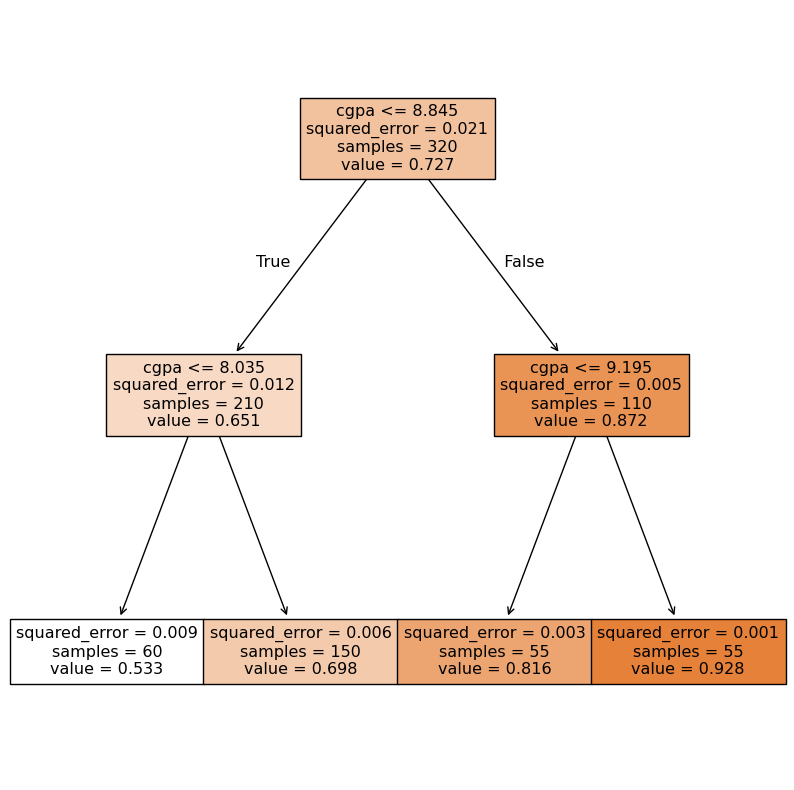

In [35]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names = x_train.columns, max_depth=2, filled=True)

### Split Criteria

- Unlike the classification problem, there are no longer classes to split the tree by. 
- Instead, at each level, the value is the average of all samples that fit the logical criteria. 
- In terms of evaluating the split, the default method is MSE. 
- For example, the root node, the average target value is 0.727 (verify `y_train.mean()`). 
- Then the MSE (mean-squared error) if we were to use 0.727 as the value for all samples, would be:
- `np.mean((y_train - y_train.mean())**2) = 0.02029`

<br>

- Now to determine the split, for each value of `cpga`, the information gain, or decrease in MSE after the split, is calculated and then values are sorted. 
- Like before, we can modify our functions for the regression version, and see the best split is again `cpga<=8.84`.

<br>

- The below code walks you through the details – in the regression version, instead of Gini impurity, MSE is used, and the information gain function is modified to `mse_gain`.

In [36]:
import numpy as np


def mse(data):
    """Calculate the MSE of a data set
    """
    return np.mean((data - data.mean())**2)

def mse_gain(left, right, current_mse):
    """Information Gain (MSE) associated with creating a node/split data based on MSE.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse(left) - (1 - w) * mse(right)

m = mse(y_train)
print(f'MSE at root: {round(m,3)}')

mse_gain_list = []
for i in x_train.cgpa.unique():
    left = y_train[x_train.cgpa<=i]
    right = y_train[x_train.cgpa>i]
    mse_gain_list.append([i, mse_gain(left, right, m)])

mse_table = pd.DataFrame(mse_gain_list,columns=['split_value', 'info_gain']).sort_values('info_gain',ascending=False)
print(mse_table.head(10))

MSE at root: 0.021
     split_value  info_gain
10          8.84   0.011065
96          8.80   0.011037
98          8.83   0.011023
124         8.85   0.010985
125         8.73   0.010939
110         8.87   0.010932
139         8.88   0.010895
1           8.70   0.010894
17          8.76   0.010858
140         8.74   0.010850


- Plot the results:

Text(0, 0.5, 'info gain')

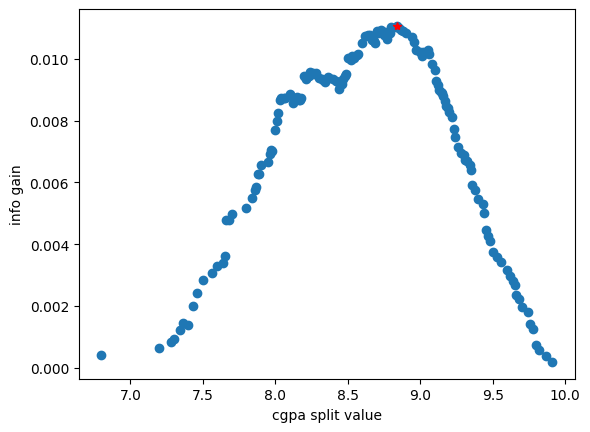

In [37]:
plt.plot(mse_table['split_value'], mse_table['info_gain'],'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

- Again, the process will continue until there is no increase in information gain by splitting. 
- Now that the tree has been built, evaluation occurs in pretty much the same way. 
- Any sample traverses through the tree until it reaches a leaf node and is then assigned the average value of the samples in leaf. 
- Depending on the depth of the tree, *the predicted values can be limited*. 
- In this example, only four unique predicted values are possible, which we can verify. 
- This is something to be aware of when using a decision tree regressor, unlike linear/logistic regression, not all output values may be possible.

In [38]:
np.unique(dt.predict(x_train))

array([0.53283333, 0.6976    , 0.81618182, 0.92781818])

## Summary

- We’ve seen how decision trees can be used for both classification and regression tasks.
    - The fundamental difference is that for classification, splits are based on Gini impurity error calculations whereas for regression, Mean Squared Error minimization is used.
    - Tree traversal based on information gain and evaluation works pretty much the same way for both tasks.
    - Decision tree regressors differ from other regressors in that all output values may not be possible and it depends on the depth of the tree.